In [112]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)

data_pm10 = pd.read_csv('pm10.csv')
data_no2 = pd.read_csv('NO2.csv')
print(len(data_no2))
data_pm10.head(10)

2927


,Stazione,Data inizio,Data fine,Strumento,PM10,Unità di misura,F1,F2,F3,F4
0,DE AMICIS,31/12/2019,01/01/2020,FAI SWAM 5A,42.0,ug/m3,NaN,1.0,1,1
1,DE AMICIS,01/01/2020,02/01/2020,FAI SWAM 5A,39.0,ug/m3,NaN,NaN,1,1
2,DE AMICIS,02/01/2020,03/01/2020,FAI SWAM 5A,49.0,ug/m3,NaN,NaN,1,1
3,DE AMICIS,03/01/2020,04/01/2020,FAI SWAM 5A,44.0,ug/m3,NaN,NaN,1,1
4,DE AMICIS,04/01/2020,05/01/2020,FAI SWAM 5A,27.0,ug/m3,NaN,NaN,1,1
5,DE AMICIS,05/01/2020,06/01/2020,FAI SWAM 5A,28.0,ug/m3,NaN,NaN,1,1
6,DE AMICIS,06/01/2020,07/01/2020,FAI SWAM 5A,18.0,ug/m3,NaN,NaN,1,1
7,DE AMICIS,07/01/2020,08/01/2020,FAI SWAM 5A,53.0,ug/m3,NaN,NaN,1,1
8,DE AMICIS,08/01/2020,09/01/2020,FAI SWAM 5A,52.0,ug/m3,NaN,NaN,1,1
9,DE AMICIS,09/01/2020,10/01/2020,FAI SWAM 5A,45.0,ug/m3,NaN,NaN,1,1


In [113]:
data_no2.head(10)

,Stazione,Data inizio,Data fine,Strumento,NO2 (Biossido di azoto),Unità di misura,F1,F2,F3,F4
0,DE AMICIS,31/12/2019 23.00.00,01/01/2020,API 200E,16.0,ug/m3,NaN,1.0,1.0,1
1,DE AMICIS,01/01/2020,01/01/2020 1.00.00,API 200E,26.0,ug/m3,NaN,NaN,1.0,1
2,DE AMICIS,01/01/2020 1.00.00,01/01/2020 2.00.00,API 200E,25.0,ug/m3,NaN,NaN,1.0,1
3,DE AMICIS,01/01/2020 2.00.00,01/01/2020 3.00.00,API 200E,24.0,ug/m3,NaN,NaN,1.0,1
4,DE AMICIS,01/01/2020 3.00.00,01/01/2020 4.00.00,API 200E,32.0,ug/m3,NaN,NaN,1.0,1
5,DE AMICIS,01/01/2020 4.00.00,01/01/2020 5.00.00,API 200E,21.0,ug/m3,NaN,NaN,1.0,1
6,DE AMICIS,01/01/2020 5.00.00,01/01/2020 6.00.00,API 200E,18.0,ug/m3,NaN,NaN,1.0,1
7,DE AMICIS,01/01/2020 6.00.00,01/01/2020 7.00.00,API 200E,26.0,ug/m3,NaN,NaN,1.0,1
8,DE AMICIS,01/01/2020 7.00.00,01/01/2020 8.00.00,API 200E,29.0,ug/m3,NaN,NaN,1.0,1
9,DE AMICIS,01/01/2020 8.00.00,01/01/2020 9.00.00,API 200E,29.0,ug/m3,NaN,NaN,1.0,1


In [114]:
data_no2 = data_no2.iloc[::12, :]
data_no2 = data_no2.fillna(method='ffill')
len(data_no2)

244

In [115]:
#data_pm10 = data_pm10.set_index('Data fine')
data_pm10 = data_pm10.fillna(method='ffill')
#data_no2 = data_no2.set_index('Data fine')

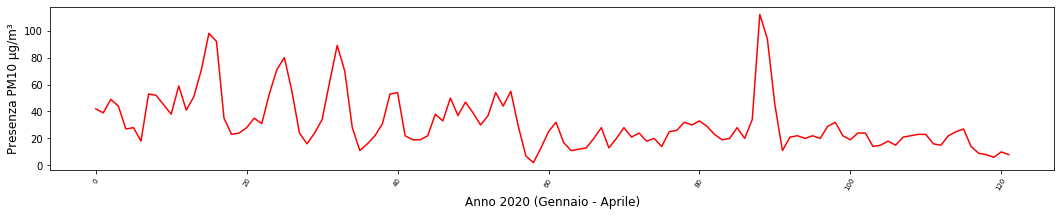

In [119]:
plt.figure(figsize = (18, 3))
plt.plot(data_pm10['PM10'], color = "red")
plt.xlabel('Anno 2020 (Gennaio - Aprile)', fontsize=12)
plt.ylabel('Presenza PM10 µg/m³',  fontsize=12)
plt.xticks(rotation=60, fontsize=7)
plt.show()

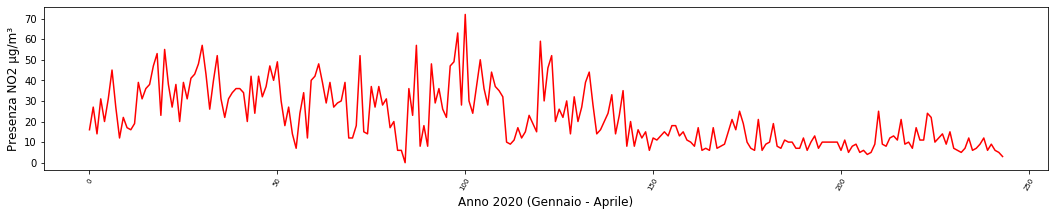

In [120]:
plt.figure(figsize = (18, 3))
plt.plot(data_no2['NO2 (Biossido di azoto)'], color = "red")
plt.xlabel('Anno 2020 (Gennaio - Aprile)', fontsize=12)
plt.ylabel('Presenza NO2 µg/m³',  fontsize=12)
plt.xticks(rotation=60, fontsize=7)
plt.show()

In [118]:
data_no2.reset_index(inplace=True)
data_no2['Data fine'] = pd.to_datetime(data_no2['Data fine'])
data_no2 = data_no2.set_index('Data fine')
print(data_no2)
decomp = decompose(data_no2['NO2 (Biossido di azoto)'], period = 7)

with plt.rc_context():
    plt.rc("figure", figsize=(20,8))
    decomp.plot()
    plt.show()

ValueError: ('Unknown string format:', '01/01/2020 12.00.00')